In [18]:
import json
import librosa
from essentia.standard import MonoLoader, TensorflowPredictMusiCNN, TensorflowPredictVGGish
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload

In [15]:
import src.mir
reload(src.mir)
from src.mir import MIR


mir = MIR(weights_path='weights/')

In [16]:
%time res = mir.recognize_file('sample/ambienceTrack_001(1).mp3')

CPU times: user 1min 28s, sys: 6.95 s, total: 1min 35s
Wall time: 24.9 s


### Key/Scale

In [7]:
res['key']

'D-major'

### Genre

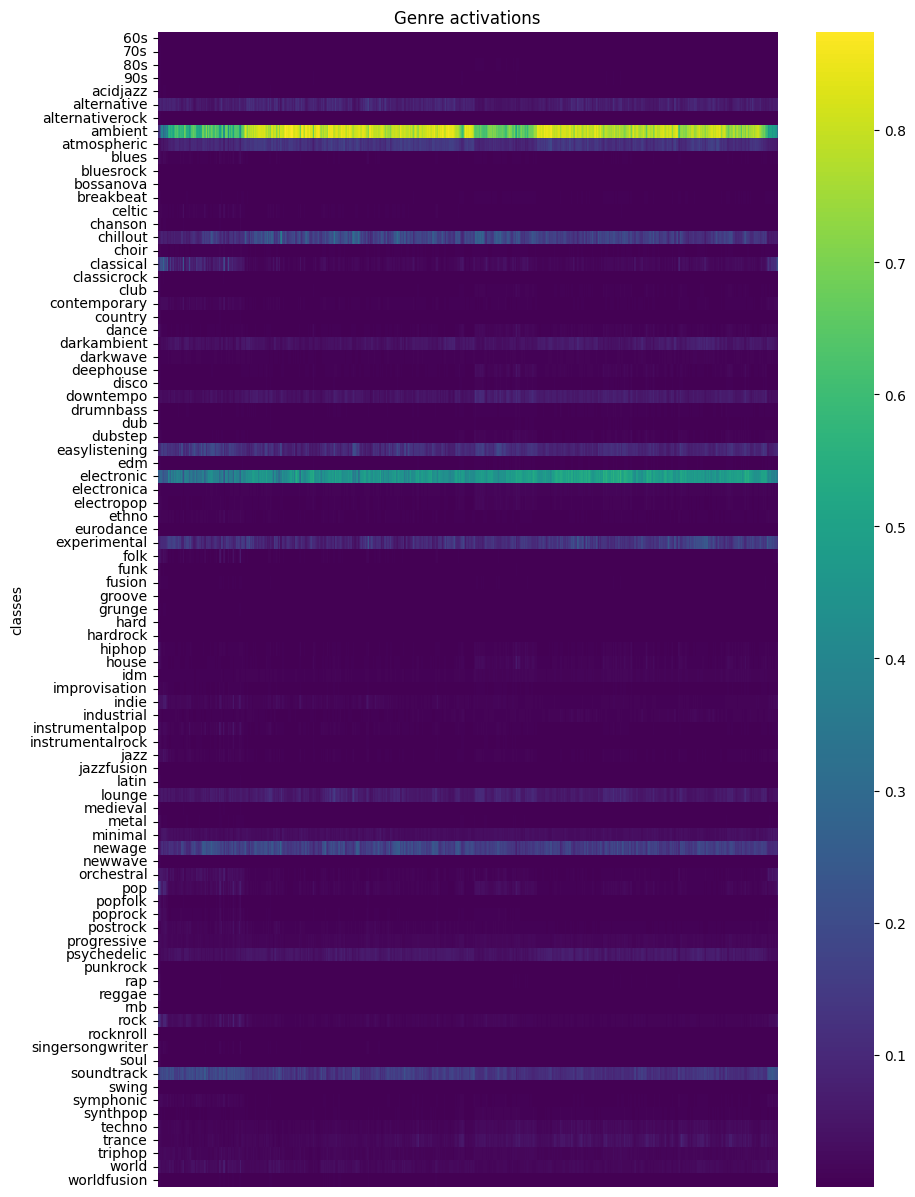

In [9]:
plt.figure(figsize=(10, 15))
ax = sns.heatmap(
    res['genre'].T, annot=False, cmap='viridis', cbar=True, yticklabels=mir.genre_classes, xticklabels=False
)
ax.set_ylabel('classes')
ax.set_title('Genre activations')

# Move x-axis to bottom
ax.xaxis.tick_bottom()

plt.show()

### Instrumentation

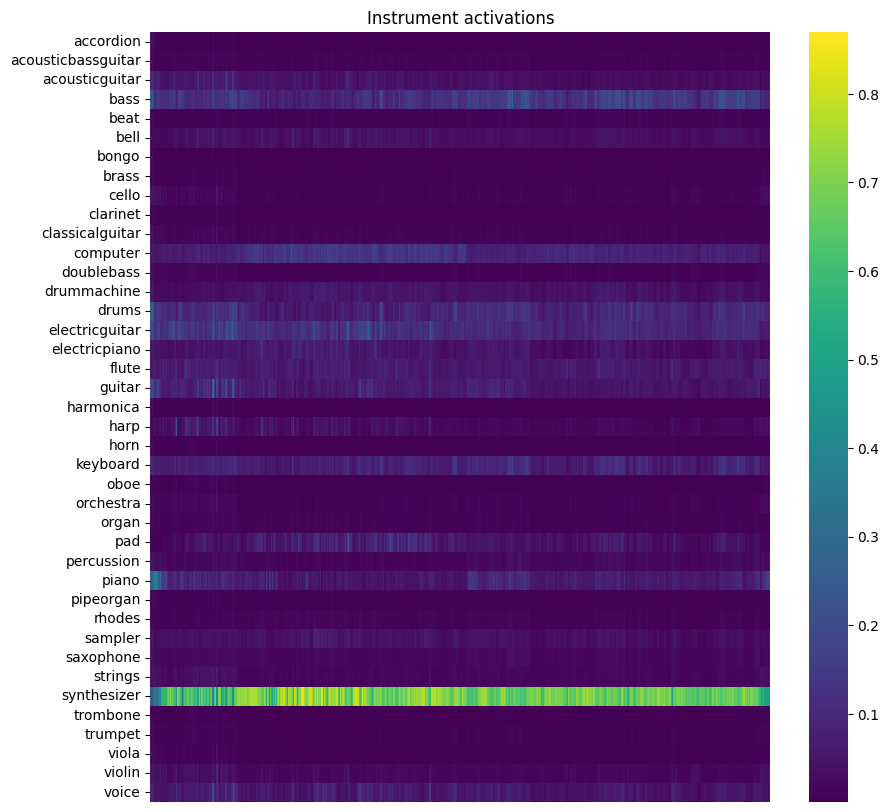

In [10]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    res['instrument'].T, annot=False, cmap='viridis', cbar=True, yticklabels=mir.inst_classes, xticklabels=False
)
ax.set_title('Instrument activations')

# Move x-axis to bottom
ax.xaxis.tick_bottom()

plt.show()

### Emotion Recognition

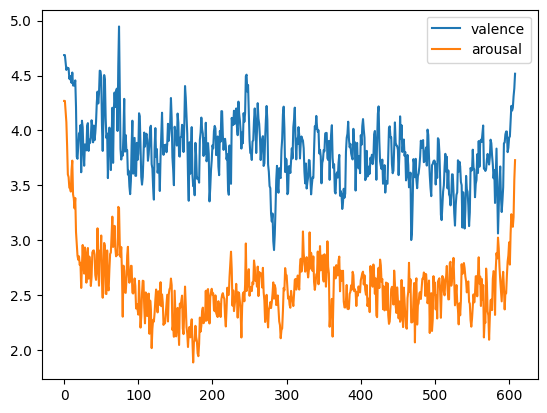

In [11]:
plt.plot(res['emotion'][:, 0], label='valence')
plt.plot(res['emotion'][:, 1], label='arousal')
plt.legend()

### Beat / Tempo

In [17]:
res['tempo']

119.0

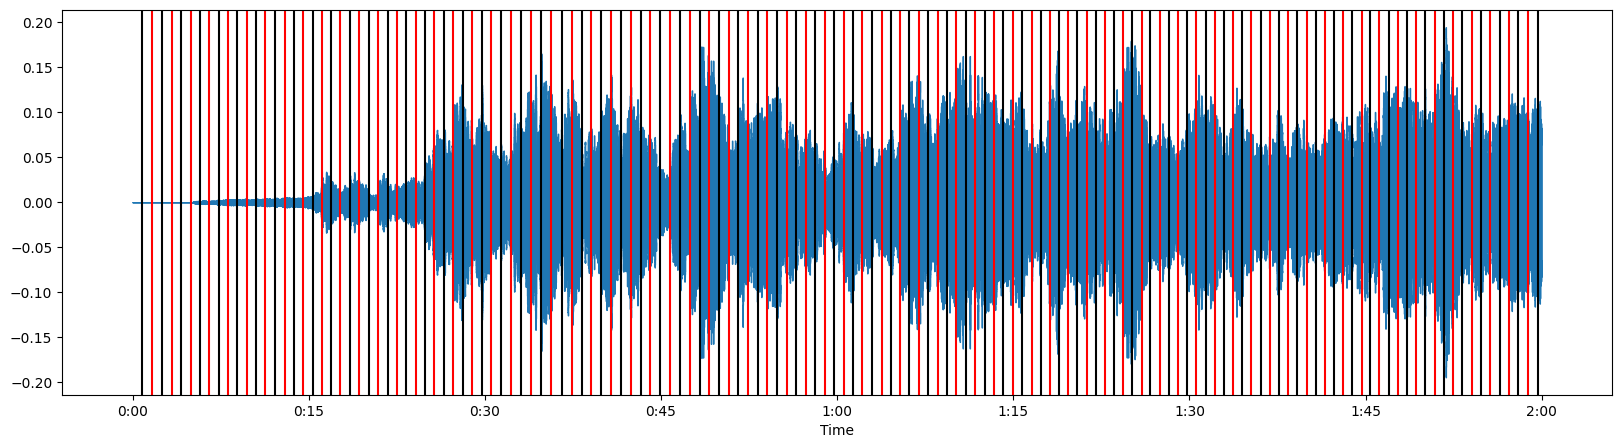

In [21]:
audio, sr = librosa.load('sample/ambienceTrack_001(1).mp3', sr=22050)

plt.figure(figsize=(20, 5))
s = 0 * 60 
e = 2 * 60
librosa.display.waveshow(audio[s * sr: e * sr], sr=sr)
beats = res['beats'][:, 0]
is_downbeat = res['beats'][:, 1]
mask = (beats > s) & (beats < e)

for beat, is_db in zip(beats[mask], is_downbeat[mask]):
    if is_db == 1:
        plt.axvline(x=beat-s, color='red')
    else:
        plt.axvline(x=beat-s, color='black')